# Dataset clustering using DBSCAN

In [1]:
from sklearn.cluster import DBSCAN
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

# Loading Data

In [30]:
data = pd.read_csv('final_dataset.csv',names=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])
data.drop(index=data.index[0], 
        axis=0, 
        inplace=True)

In [31]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,urban,14,2098224,2133952,516096,458752,69504,224,72,9,224,192,4,130944
2,urban,14,3,2133952,4096,1081344,69632,6,80,8,7936,156,3,1
3,urban,448,2080768,2158592,4096,458752,124,1536,72,9,224,156,8,130944
4,urban,48,960,2158592,516096,1605568,69632,224,96,32,7936,192,4,49214
5,urban,33,2098224,2158592,262175,1605568,69504,1536,80,20,224,160,8,49214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,urban,448,2080768,2097212,4096,1605568,57344,256,80,20,7936,192,4,130944
496,rural,14,3,2158592,516096,1081344,69632,1536,80,32,7936,160,2,49214
497,urban,448,2111488,2031616,3584,458752,57344,256,72,32,7936,192,8,130944
498,urban,48,2080768,2158592,4096,1,69504,256,80,18,7936,192,4,130944


In [32]:
for e in data:
    print("********************************")
    print(e)
    print(data[e].value_counts())

********************************
0
urban    411
rural     88
Name: 0, dtype: int64
********************************
1
448    204
48     139
14     114
33      42
Name: 1, dtype: int64
********************************
2
2080768    172
2111488    101
960         90
2098224     54
2098188     42
3           40
Name: 2, dtype: int64
********************************
3
2031616    202
2158592    100
2133952     97
2097212     71
2097155     29
Name: 3, dtype: int64
********************************
4
516096    167
4096      158
3584      148
480        15
262175     11
Name: 4, dtype: int64
********************************
5
458752     146
1081344    137
1605568    133
524350      52
1           31
Name: 5, dtype: int64
********************************
6
57344    180
69632     93
69504     90
124       85
65539     51
Name: 6, dtype: int64
********************************
7
1536    167
256     143
224      91
24       43
6        30
1        14
0        11
Name: 7, dtype: int64
***************

In [147]:
d = data[[1,2,3,5,7,8,9,10,11,12,13]] #best result
#d = data[[1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [148]:
d

,1,2,3,5,7,8,9,10,11,12,13
1,14,2098224,2133952,458752,224,72,9,224,192,4,130944
2,14,3,2133952,1081344,6,80,8,7936,156,3,1
3,448,2080768,2158592,458752,1536,72,9,224,156,8,130944
4,48,960,2158592,1605568,224,96,32,7936,192,4,49214
5,33,2098224,2158592,1605568,1536,80,20,224,160,8,49214
...,...,...,...,...,...,...,...,...,...,...,...
495,448,2080768,2097212,1605568,256,80,20,7936,192,4,130944
496,14,3,2158592,1081344,1536,80,32,7936,160,2,49214
497,448,2111488,2031616,458752,256,72,32,7936,192,8,130944
498,48,2080768,2158592,1,256,80,18,7936,192,4,130944


In [154]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=7)
nbrs = neigh.fit(d)
distances, indices = nbrs.kneighbors(d)

In [155]:
distances[:,1]

array([3.02283401e+04, 2.88617394e+01, 7.72331444e+03, 4.52548340e+01,
       1.28052177e+03, 1.63909571e+04, 1.35277493e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.85904632e+03, 2.41621605e+02,
       2.55033331e+02, 3.94461658e+01, 2.80032324e+04, 2.20183810e+03,
       2.40975102e+02, 2.16794834e+01, 6.72978454e+01, 1.34680734e+03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.31223245e+03,
       2.70185122e+01, 7.72552574e+03, 2.35025531e+02, 2.20183810e+03,
       2.57046688e+02, 1.28155726e+03, 3.58468967e+01, 0.00000000e+00,
       3.43644370e+04, 1.41421356e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.30336192e+02, 0.00000000e+00,
       4.95940521e+02, 0.00000000e+00, 2.40208243e+01, 1.34142760e+03,
       2.03960781e+01, 7.77522154e+03, 1.90837381e+04, 1.74609706e+04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

# Plotting K-distance Graph

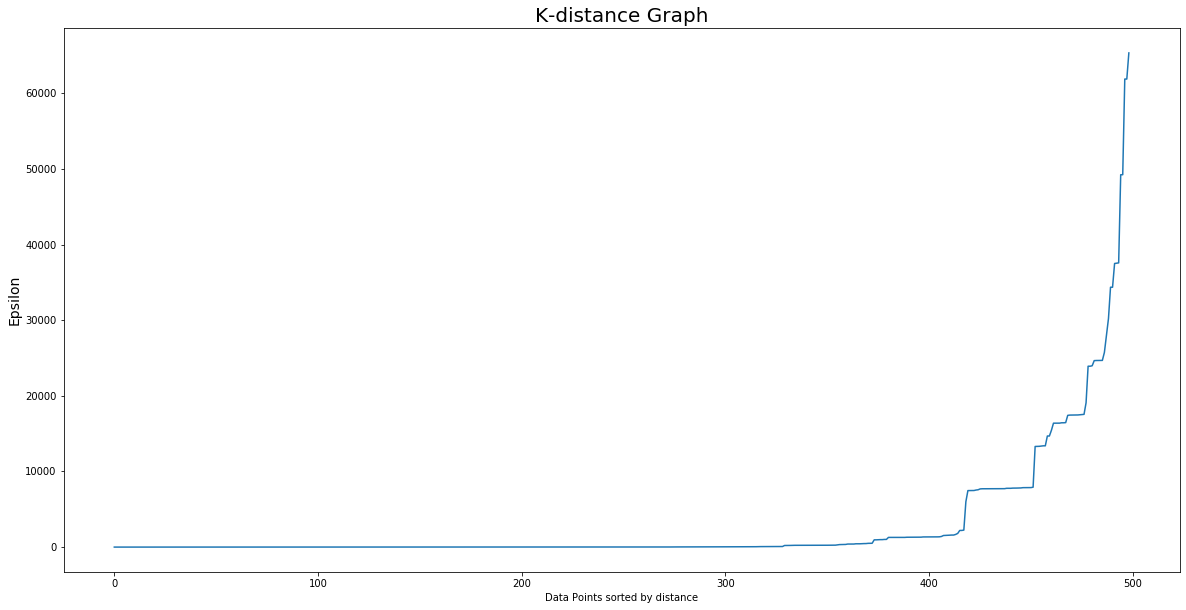

In [156]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [163]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=70000,min_samples=7) #best result
#dbscan_opt=DBSCAN(eps=100000,min_samples=13)
dbscan_opt.fit(d)
new_data = data[:]

In [164]:
new_data['DBSCAN_opt_labels']=dbscan_opt.labels_
new_data['DBSCAN_opt_labels'].value_counts()

 0    167
 4     91
 3     90
 1     46
 2     43
 5     24
 7     21
-1     10
 6      7
Name: DBSCAN_opt_labels, dtype: int64

In [134]:
new_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,DBSCAN_opt_labels
1,urban,14,2098224,2133952,516096,458752,69504,224,72,9,224,192,4,130944,4
2,urban,14,3,2133952,4096,1081344,69632,6,80,8,7936,156,3,1,0
3,urban,448,2080768,2158592,4096,458752,124,1536,72,9,224,156,8,130944,4
4,urban,48,960,2158592,516096,1605568,69632,224,96,32,7936,192,4,49214,1
5,urban,33,2098224,2158592,262175,1605568,69504,1536,80,20,224,160,8,49214,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,urban,448,2080768,2097212,4096,1605568,57344,256,80,20,7936,192,4,130944,2
496,rural,14,3,2158592,516096,1081344,69632,1536,80,32,7936,160,2,49214,0
497,urban,448,2111488,2031616,3584,458752,57344,256,72,32,7936,192,8,130944,4
498,urban,48,2080768,2158592,4096,1,69504,256,80,18,7936,192,4,130944,-1


In [31]:
data

,1,2,3,4,7,8,9,10,12
1,14,2098224,2133952,516096,224,72,9,224,4
2,14,3,2133952,4096,6,80,8,7936,3
3,448,2080768,2158592,4096,1536,72,9,224,8
4,48,960,2158592,516096,224,96,32,7936,4
5,33,2098224,2158592,262175,1536,80,20,224,8
...,...,...,...,...,...,...,...,...,...
495,448,2080768,2097212,4096,256,80,20,7936,4
496,14,3,2158592,516096,1536,80,32,7936,2
497,448,2111488,2031616,3584,256,72,32,7936,8
498,48,2080768,2158592,4096,256,80,18,7936,4
